In [642]:
import numpy as np, pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [643]:
bike = pd.read_csv('day.csv')

In [644]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [645]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [646]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [647]:
# dropping columns 'instant','temp','casual','registered', 'dteday'

bike = bike.drop(columns=['instant','temp','casual','registered','dteday'],axis=1)

In [648]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [649]:
# Converting following columns to categorical data for better visualisation:
bike['season']=bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['weathersit']=bike.weathersit.map({1:'clear', 2:'misty', 3:'light rain', 4:'heavy rain'})

In [650]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,misty,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,misty,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear,11.46350,43.6957,12.522300,1600


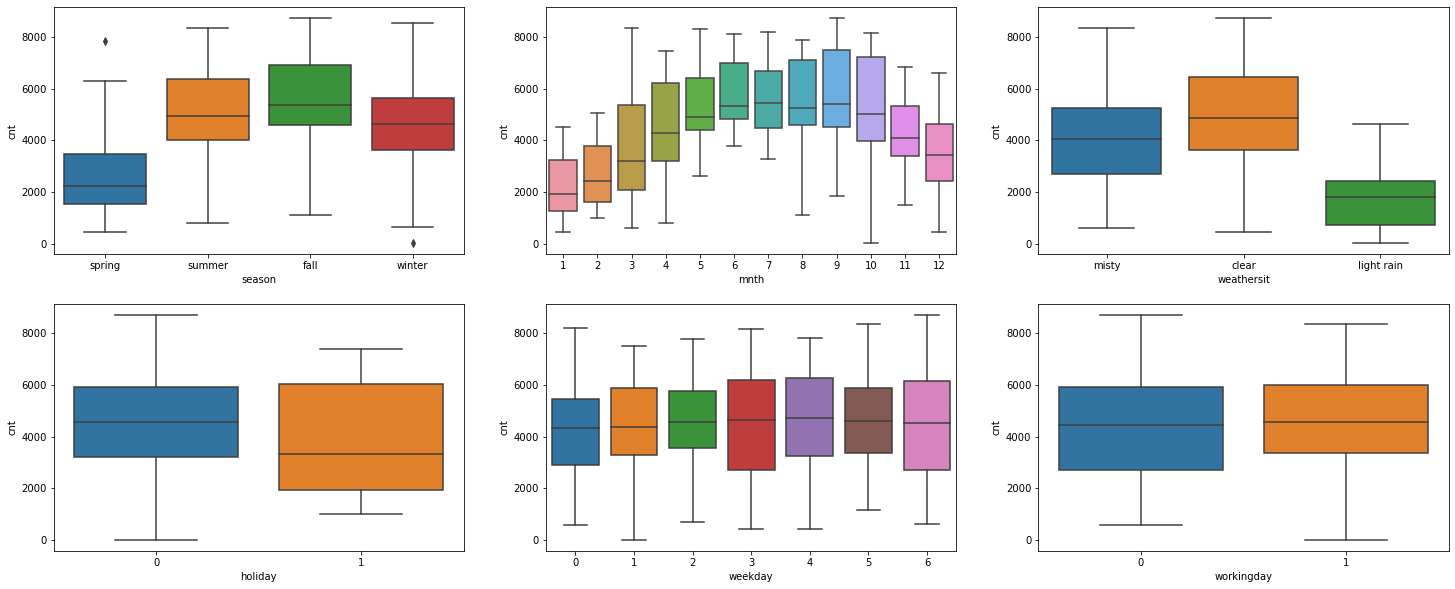

In [651]:
# Visualisation of categorical variables againt the target variable

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

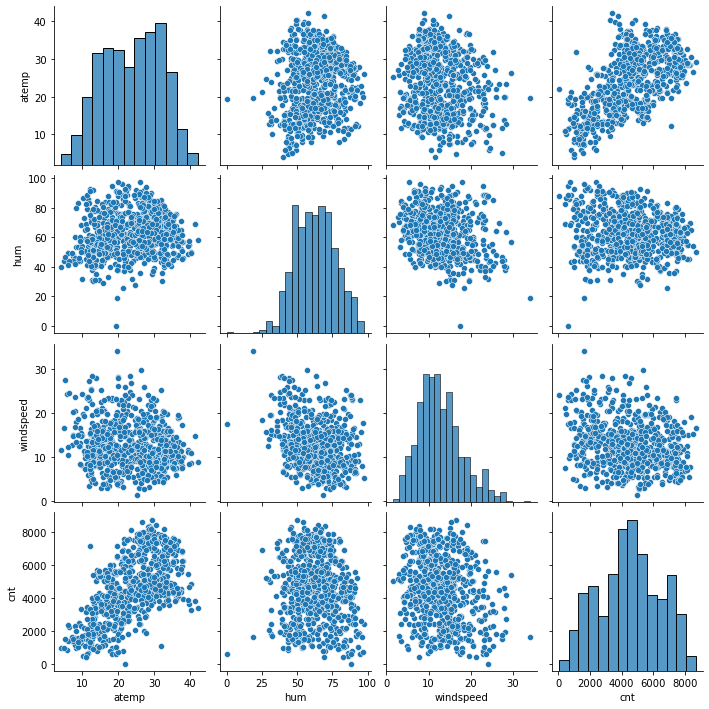

In [652]:
# pairplot for continuous variable

col=['atemp','hum','windspeed','cnt']
sns.pairplot(bike[col])
plt.show()

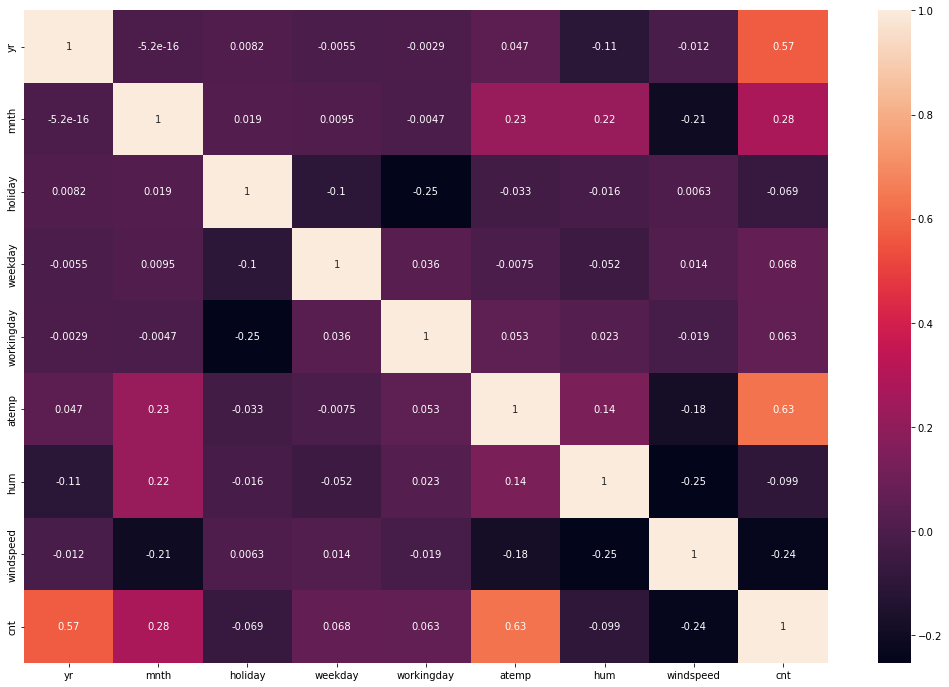

In [653]:
# Heatmap

plt.figure(figsize=(18,12))
sns.heatmap(bike.corr(), annot=True)
plt.show()

## Data Preparation

In [654]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,misty,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,misty,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear,11.46350,43.6957,12.522300,1600


#### Dummy Variables

In [655]:
# encoding Season and Weathersit

Weathersit = pd.get_dummies(bike['weathersit'], drop_first=True)
Season =pd.get_dummies(bike['season'], drop_first=True)

bike=pd.concat([bike,Season,Weathersit], axis=1)
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,light rain,misty
0,spring,0,1,0,6,0,misty,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,spring,0,1,0,0,0,misty,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,spring,0,1,0,1,1,clear,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,spring,0,1,0,2,1,clear,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,spring,0,1,0,3,1,clear,11.46350,43.6957,12.522300,1600,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,4,1,misty,11.33210,65.2917,23.458911,2114,1,0,0,0,1
726,spring,1,12,0,5,1,misty,12.75230,59.0000,10.416557,3095,1,0,0,0,1
727,spring,1,12,0,6,0,misty,12.12000,75.2917,8.333661,1341,1,0,0,0,1
728,spring,1,12,0,0,0,clear,11.58500,48.3333,23.500518,1796,1,0,0,0,0


In [656]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,light rain,misty
0,spring,0,1,0,6,0,misty,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,spring,0,1,0,0,0,misty,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,spring,0,1,0,1,1,clear,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,spring,0,1,0,2,1,clear,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,spring,0,1,0,3,1,clear,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [657]:
# drop season and weathersit since we have encoded them

bike=bike.drop(columns=['season','weathersit'],axis=1)

In [658]:
bike.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light rain,misty
0,0,1,0,6,0,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


### Train and Test Split

In [659]:
# splitting into bike_train and bike_test

from sklearn.model_selection import train_test_split
bike_train,bike_test= train_test_split(bike,test_size=0.2,random_state=100)

In [660]:
bike_train.shape, bike_test.shape

((584, 14), (146, 14))

### Scaling

In [661]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scale_col=['mnth','weekday','yr','atemp','hum','windspeed','cnt']
# fit_transform
bike_train[scale_col]=scaler.fit_transform(bike_train[scale_col])

In [662]:
bike_train.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light rain,misty
367,1.0,0.000000,0,0.333333,1,0.061963,0.454701,0.695175,0.254717,1,0,0,0,0
648,1.0,0.818182,0,0.666667,1,0.462175,0.477458,0.299450,0.868385,0,0,1,0,0
44,0.0,0.090909,0,0.166667,1,0.419099,0.387290,0.807474,0.217556,1,0,0,0,0
705,1.0,1.000000,0,0.833333,1,0.318824,0.787463,0.189819,0.573631,0,0,1,0,1
379,1.0,0.000000,0,0.000000,0,0.108365,0.431945,0.449210,0.263346,1,0,0,0,0


In [663]:
bike_train.describe()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light rain,misty
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.504514,0.027397,0.490011,0.667808,0.513175,0.649499,0.319463,0.515792,0.251712,0.246575,0.250000,0.027397,0.342466
std,0.500241,0.316099,0.163378,0.337658,0.471403,0.211663,0.144219,0.168114,0.225336,0.434369,0.431387,0.433384,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.331819,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.530558,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.690521,0.752361,0.410413,0.691872,1.000000,0.000000,0.250000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [664]:
# assign y_train and x_train

y_train=bike_train.pop('cnt')
X_train=bike_train

### Model Building

In [665]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [666]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select= 10)
rfe = rfe.fit(X_train, y_train)

In [667]:
#Ranking

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('light rain', True, 1),
 ('misty', True, 1)]

In [668]:
# columns selected after RFE

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'weekday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'light rain', 'misty'],
      dtype='object')

#### Model Building using statsmodel

In [669]:
# Creating X_train dataframe

X_train_rfe=X_train[col]

In [670]:
#adding constant var
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()

In [671]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     284.8
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          6.70e-215
Time:                        17:40:52   Log-Likelihood:                 563.83
No. Observations:                 584   AIC:                            -1106.
Df Residuals:                     573   BIC:                            -1058.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2986      0.031      9.540      0.000       0.237       0.360
yr             0.2307      0.008     29.551      0.000       0.215       0.246
holiday       -0.0876      0.024     -3.678      0.000      -0.134      -0.041
weekday        0.0549      0.012      4.772      0.000       0.032       0.078
atemp          0.4768      0.029     16.241      0.000       0.419       0.534
hum           -0.1207      0.037     -3.270      0.001      -0.193      -0.048
windspeed     -0.1514      0.025     -6.087      0.000      -0.200      -0.103
spring        -0.1248      0.014     -8.738      0.000      -0.153      -0.097
winter         0.0531      0.012      4.591      0.000       0.030       0.076
light rain    -0.2517      0.026     -9.576      0.000      -0.303      -0.200
misty         -0.0547      0.010     -5.339      0.000      -0.075      -0.035
==============================================================================
Omnibus:                      103.314   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.275
Skew:                          -0.903   Prob(JB):                     3.03e-57
Kurtosis:                       5.726   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [672]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,66.10
4,atemp,2.60
7,spring,2.59
5,hum,1.91
8,winter,1.70
10,misty,1.59
9,light rain,1.24
6,windspeed,1.18
1,yr,1.03
2,holiday,1.02


### Residual Analysis

In [673]:
# making prediction on training set

y_train_pred=lm.predict(X_train_rfe)

/Users/ishangill/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


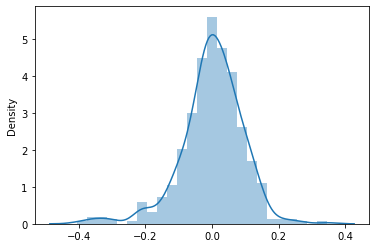

In [674]:
# plotting histogram for error terms

fig=plt.figure()
residual=y_train-y_train_pred
sns.distplot(res,bins=25)
plt.show()

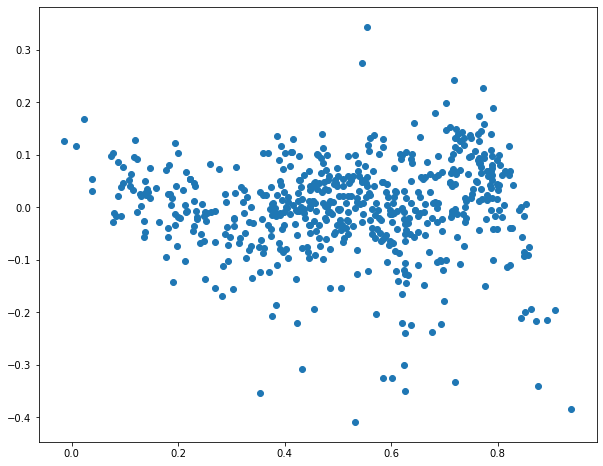

In [675]:
#plotting scatter plot for error terms

plt.figure(figsize=(10,8))
plt.scatter(y_train_pred,residual)
plt.show()

#### Prediction on test set

In [676]:
# scaling on the test dataset
col=['mnth','weekday','yr','atemp','hum','windspeed','cnt']
bike_test[col]=scaler.transform(bike_test[col])

In [677]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [678]:
# make predictions

X_train_rfe=X_train_rfe.drop('const',1)

# Creating X_test
X_test_rfe = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

/var/folders/pk/ll6s_4d93yx326pw5ttxm9bc0000gn/T/ipykernel_41806/4000877951.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_rfe=X_train_rfe.drop('const',1)


In [680]:
# Making predictions

y_test_pred = lm.predict(X_test_rfe)

### Model Evaluation

In [681]:
# R2 Score

from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7778620692712088

Text(0, 0.5, 'y_test_pred')

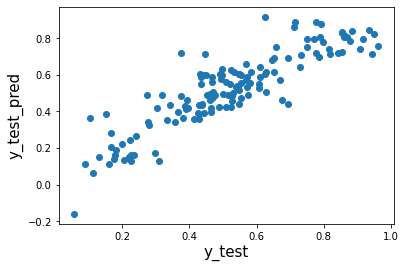

In [683]:
# y_test VS y_pred.

fig = plt.figure()
plt.scatter(y_test,y_test_pred) 
plt.xlabel('y_test', fontsize=15)                       
plt.ylabel('y_test_pred', fontsize=15)   

- Train R Squared :0.833
- Test R Squared :0.778